In [13]:
import numpy as np
import matplotlib.pyplot as plt

def formula_fox(diametro, carga, temp, gravidade, pressao_atmosferica, pessoas):
    nova_carga = ((69/0.10197)*pessoas) + carga
    pressao_arquente = pressao_atmosferica - ((6*nova_carga)/(gravidade*np.pi*(diametro**3)))
    temp_arquente = ((temp*pressao_atmosferica)/pressao_arquente)
    return pressao_arquente, temp_arquente

# Função para calcular o gradiente da pressão do ar quente em relação ao diâmetro
def gradiente_pressao(diametro, carga, temperatura, gravidade, pressao_atmosferica, pessoas):
    h = 1e-5  # Passo de diferenciação
    grad = (formula_fox(diametro + h, carga, temperatura, gravidade, pressao_atmosferica, pessoas)[0] - formula_fox(diametro, carga, temperatura, gravidade, pressao_atmosferica, pessoas)[0]) / h
    return grad

# Função para calcular o gradiente da temperatura do ar quente em relação ao diâmetro
def gradiente_temperatura(diametro, carga, temperatura, gravidade, pressao_atmosferica, pessoas):
    h = 1e-5  # Passo de diferenciação
    grad = (formula_fox(diametro + h, carga, temperatura, gravidade, pressao_atmosferica, pessoas)[1] - formula_fox(diametro, carga, temperatura, gravidade, pressao_atmosferica, pessoas)[1]) / h
    return grad

def otimizar_diametro(carga, temperatura, gravidade, pressao_atmosferica, pessoas, learning_rate=0.1, num_iteracoes=100, diametro_inicial=15):
    diametro = diametro_inicial
    historico_diametro = [diametro]
    historico_pressao_arquente = [formula_fox(diametro, carga, temperatura, gravidade, pressao_atmosferica, pessoas)[0]]
    historico_temperatura_arquente = [formula_fox(diametro, carga, temperatura, gravidade, pressao_atmosferica, pessoas)[1]]

    for i in range(num_iteracoes):
        grad_pressao_arquente = gradiente_pressao(diametro, carga, temperatura, gravidade, pressao_atmosferica, pessoas)
        grad_temperatura_arquente = gradiente_temperatura(diametro, carga, temperatura, gravidade, pressao_atmosferica, pessoas)
        # Atualização do diâmetro
        diametro += learning_rate * grad_pressao_arquente - learning_rate * grad_temperatura_arquente  # Combinação dos gradientes
        # Atualização dos históricos
        pressao_arquente = formula_fox(diametro, carga, temperatura, gravidade, pressao_atmosferica, pessoas)[0]
        temp_arquente = formula_fox(diametro, carga, temperatura, gravidade, pressao_atmosferica, pessoas)[1]
        historico_diametro.append(diametro)
        historico_pressao_arquente.append(pressao_arquente)
        historico_temperatura_arquente.append(temp_arquente)

    return diametro, historico_diametro, historico_pressao_arquente, historico_temperatura_arquente


carga = 2670
temperatura = 288
gravidade = 9.81 
pressao_atmosferica = 1.227
pessoas = 0 



+ Gráfico Aumentando Quantidade de Pessoas

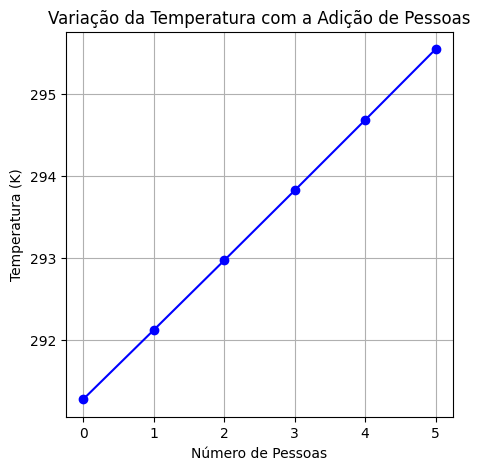

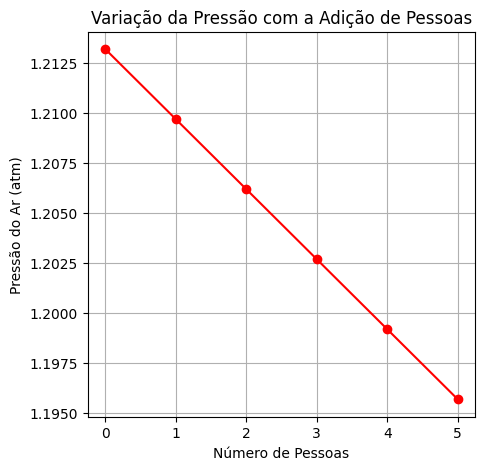

In [24]:
pressures = []
temperatures = []

for i in range(6):
    pressao_arquente, temeperatura_arquente = formula_fox(diametro, carga, temperatura, gravidade, pressao_atmosferica, i)
    pressures.append(pressao_arquente)
    temperatures.append(temeperatura_arquente)
    #print(temp_air, " - ",i)

plt.figure(figsize=(5, 5))
plt.plot(range(6), temperatures, marker='o', color='blue')
plt.xlabel('Número de Pessoas')
plt.ylabel('Temperatura (K)')
plt.title('Variação da Temperatura com a Adição de Pessoas')
plt.grid(True)
plt.show()

plt.figure(figsize=(5, 5))
plt.plot(range(6), pressures, marker='o', color='red')
plt.title('Variação da Pressão com a Adição de Pessoas')
plt.xlabel('Número de Pessoas')
plt.ylabel('Pressão do Ar (atm)')
plt.grid(True)
plt.show()

+ Gráfico Variando o Tamanho do Balão 

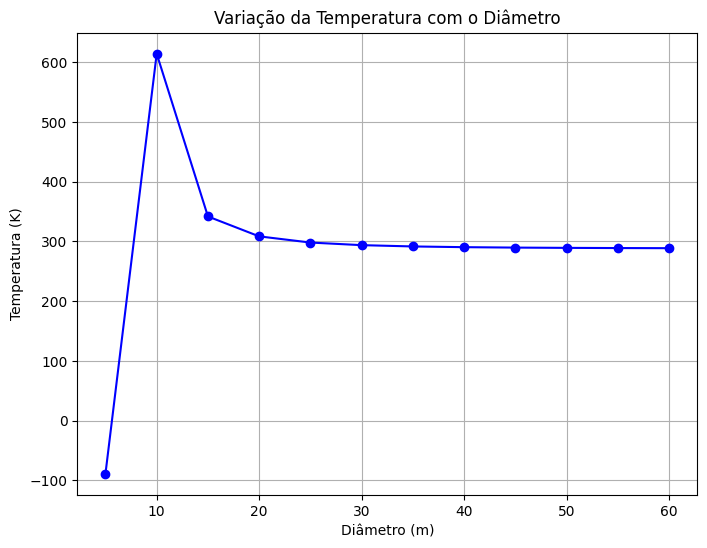

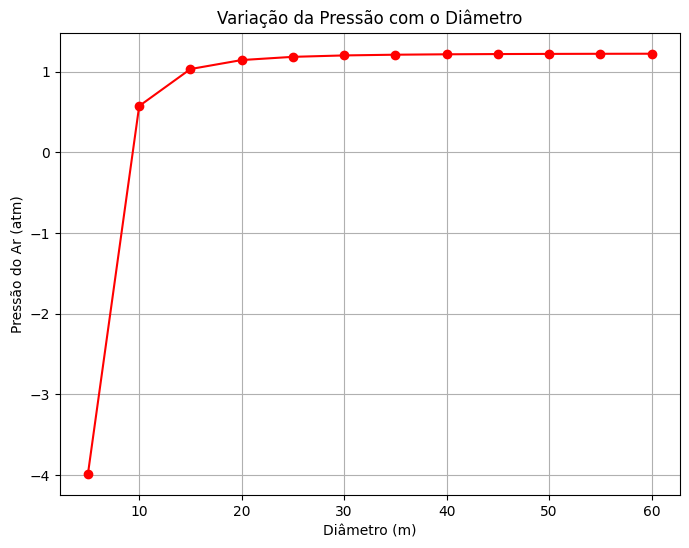

In [26]:
diametro = range(5, 61, 5)
pressures = []
temperatures = []

for diametro in diameters:
    pressao_arquente, temeperatura_arquente  = formula_fox(diametro, carga, temperatura, gravidade, pressao_atmosferica, 1)
    pressures.append(pressao_arquente)
    temperatures.append(temeperatura_arquente)


plt.figure(figsize=(8, 6))
plt.plot(diameters, temperatures, marker='o', color='blue')
plt.title('Variação da Temperatura com o Diâmetro')
plt.xlabel('Diâmetro (m)')
plt.ylabel('Temperatura (K)')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(diameters, pressures, marker='o', color='red')
plt.title('Variação da Pressão com o Diâmetro')
plt.xlabel('Diâmetro (m)')
plt.ylabel('Pressão do Ar (atm)')
plt.grid(True)
plt.show()

+ Otimização do diametro

Diâmetro otimizado: 29.050222325274753
Pressão máxima correspondente: 1.2057971007205706
Temperatura mínima correspondente: 293.06423094633965


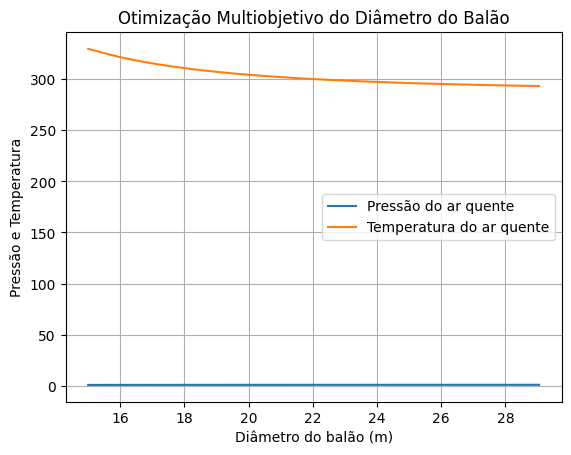

In [14]:
# Otimização do diâmetro
diametro_otimizado, hist_diametro, hist_pressao, hist_temperatura = otimizar_diametro(carga, temperatura, gravidade, pressao_atmosferica, pessoas)

# Resultados
print("Diâmetro otimizado:", diametro_otimizado)
print("Pressão máxima correspondente:", hist_pressao[-1])
print("Temperatura mínima correspondente:", hist_temperatura[-1])

# Plotagem para visualização
plt.plot(hist_diametro, hist_pressao, label='Pressão do ar quente')
plt.plot(hist_diametro, hist_temperatura, label='Temperatura do ar quente')
plt.xlabel('Diâmetro do balão (m)')
plt.ylabel('Pressão e Temperatura')
plt.title('Otimização Multiobjetivo do Diâmetro do Balão')
plt.legend()
plt.grid(True)
plt.show()


+ 1) Considerando 1 pessoa extra no cesto, qual o valor do diâmetro do balão que minimiza o Custo Total? (apresente o resultado com 4 casas decimais);

In [15]:
diametro_otimizado, hist_diametro, hist_pressao, hist_temperatura = otimizar_diametro(carga, temperatura, gravidade, pressao_atmosferica, 1)

custo_total = 50 * (hist_temperatura[-1]-273) + 200*diametro_otimizado

print("Diâmetro: {:.4f}".format(diametro_otimizado))
print("Custo Total: {:.4f}".format(custo_total))

Diâmetro: 30.4031
Custo Total: 7107.9470


+ 2) Considerando 3 pessoas extras no cesto, obtenha qual o valor do diâmetro do balão que minimiza o Custo Total? 


In [16]:
diametro_otimizado, hist_diametro, hist_pressao, hist_temperatura = otimizar_diametro(carga, temperatura, gravidade, pressao_atmosferica, 3)

custo_total = 50 * (hist_temperatura[-1]-273) + 200*diametro_otimizado

print("Diâmetro: {:.4f}".format(diametro_otimizado))
print("Custo Total: {:.4f}".format(custo_total))

Diâmetro: 32.5880
Custo Total: 7584.7275


+ 3) Considerando 5 pessoas extras no cesto, obtenha qual o valor do diâmetro do balão que minimiza o Custo Total? 


In [17]:
diametro_otimizado, hist_diametro, hist_pressao, hist_temperatura = otimizar_diametro(carga, temperatura, gravidade, pressao_atmosferica, 5)

custo_total = 50 * (hist_temperatura[-1]-273) + 200*diametro_otimizado

print("Diâmetro: {:.4f}".format(diametro_otimizado))
print("Custo Total: {:.4f}".format(custo_total))

Diâmetro: 34.3475
Custo Total: 7969.1015
